In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

print("Veri setinin ilk birkaç satırı:\n", data.head())

Veri setinin ilk birkaç satırı:
    customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV Str

In [50]:

print("Veri seti hakkında bilgi:\n")
data.info()

Veri seti hakkında bilgi:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBillin

In [51]:
print("Veri setindeki sütun ve satır sayısı:", data.shape)

Veri setindeki sütun ve satır sayısı: (7043, 21)


In [52]:
# Veri setindeki boş değerleri kontrol edelim
print("Veri setindeki boş değerlerin sayısı:\n", data.isnull().sum())

Veri setindeki boş değerlerin sayısı:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [53]:
# Eksik değerleri ele al (TotalCharges sütunundaki sayısal olmayan değerleri NaN ile değiştir ve bu satırları kaldır)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data = data.dropna()

In [54]:
# Eksik değerlerin tekrar kontrolü
print("\nEksik değerlerin tekrar kontrolü:\n")
data.isnull().sum()


Eksik değerlerin tekrar kontrolü:



customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [55]:
# Kategorik değişkenleri kodlamak için bir sözlük oluşturduk
label_encoders = {}

# Veri setinde 'object' veri tipine sahip tüm sütunları dolaştık
for column in data.select_dtypes(include=['object']).columns:
    # 'customerID' sütununu kodlamadan hariç tuttuk
    if column != 'customerID':
        # LabelEncoder kullanarak kategorik değişkenleri sayısal değerlere dönüştürdük
        label_encoders[column] = LabelEncoder()
        data[column] = label_encoders[column].fit_transform(data[column])
        
        # Kodlanmış sütunun ilk birkaç satırını yazdırdık
        print(f"\n'{column}' sütununun kodlanmış hali:\n", data[column].head())



'gender' sütununun kodlanmış hali:
 0    0
1    1
2    1
3    1
4    0
Name: gender, dtype: int32

'Partner' sütununun kodlanmış hali:
 0    1
1    0
2    0
3    0
4    0
Name: Partner, dtype: int32

'Dependents' sütununun kodlanmış hali:
 0    0
1    0
2    0
3    0
4    0
Name: Dependents, dtype: int32

'PhoneService' sütununun kodlanmış hali:
 0    0
1    1
2    1
3    0
4    1
Name: PhoneService, dtype: int32

'MultipleLines' sütununun kodlanmış hali:
 0    1
1    0
2    0
3    1
4    0
Name: MultipleLines, dtype: int32

'InternetService' sütununun kodlanmış hali:
 0    0
1    0
2    0
3    0
4    1
Name: InternetService, dtype: int32

'OnlineSecurity' sütununun kodlanmış hali:
 0    0
1    2
2    2
3    2
4    0
Name: OnlineSecurity, dtype: int32

'OnlineBackup' sütununun kodlanmış hali:
 0    2
1    0
2    2
3    0
4    0
Name: OnlineBackup, dtype: int32

'DeviceProtection' sütununun kodlanmış hali:
 0    0
1    2
2    0
3    2
4    0
Name: DeviceProtection, dtype: int32

'TechS

In [56]:

X = data.drop(columns=['customerID', 'Churn'])  # Özellikler (bağımsız değişkenler)
y = data['Churn']  # Hedef değişken (bağımlı değişken)

print("\nÖzelliklerin ilk birkaç satırı:\n")
X.head()


Özelliklerin ilk birkaç satırı:



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


In [57]:
scaler = StandardScaler()

# StandardScaler veriyi; ortalaması 0 ve varyansı 1 olacak şekilde dönüştürür
X_scaled = scaler.fit_transform(X)

# Standartlaştırılmış özelliklerin ilk birkaç satırını görüntüle 
print("\nStandartlaştırılmış özelliklerin ilk birkaç satırı:\n")
pd.DataFrame(X_scaled, columns=X.columns).head()



Standartlaştırılmış özelliklerin ilk birkaç satırı:



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.009430,-0.440327,1.035617,-0.652305,-1.280248,-3.056334,0.062666,-1.183614,-0.917837,1.242875,-1.026988,-0.924267,-1.112632,-1.121501,-0.826735,0.828939,0.399805,-1.161694,-0.994194
1,0.990658,-0.440327,-0.965608,-0.652305,0.064303,0.327189,-0.991564,-1.183614,1.408012,-1.028998,1.245441,-0.924267,-1.112632,-1.121501,0.373926,-1.206361,1.336636,-0.260878,-0.173740
2,0.990658,-0.440327,-0.965608,-0.652305,-1.239504,0.327189,-0.991564,-1.183614,1.408012,1.242875,-1.026988,-0.924267,-1.112632,-1.121501,-0.826735,0.828939,1.336636,-0.363923,-0.959649
3,0.990658,-0.440327,-0.965608,-0.652305,0.512486,-3.056334,0.062666,-1.183614,1.408012,-1.028998,1.245441,1.396963,-1.112632,-1.121501,0.373926,-1.206361,-1.473857,-0.747850,-0.195248
4,-1.009430,-0.440327,-0.965608,-0.652305,-1.239504,0.327189,-0.991564,0.172835,-0.917837,-1.028998,-1.026988,-0.924267,-1.112632,-1.121501,-0.826735,0.828939,0.399805,0.196178,-0.940457


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

print("\nEğitim seti boyutu:", X_train.shape, y_train.shape)
print("Test seti boyutu:", X_test.shape, y_test.shape)


Eğitim seti boyutu: (4922, 19) (4922,)
Test seti boyutu: (2110, 19) (2110,)


In [59]:
from sklearn.ensemble import RandomForestClassifier

# En iyi parametrelerle modeli başlattık (GridSearchCV ile bulunan parametreler)
best_rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=1,
    random_state=42
)

best_rf_model.fit(X_train, y_train)

print("Model eğitimi tamamlandı.")


Model eğitimi tamamlandı.


In [60]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Test seti üzerinde tahmin yaptık
y_pred_best = best_rf_model.predict(X_test)

accuracy_best = accuracy_score(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
class_report_best = classification_report(y_test, y_pred_best)

print("En iyi parametrelerle doğruluk oranı:", accuracy_best)
print("En iyi parametrelerle karışıklık matrisi:\n", conf_matrix_best)
print("En iyi parametrelerle sınıflandırma raporu:\n", class_report_best)


En iyi parametrelerle doğruluk oranı: 0.795734597156398
En iyi parametrelerle karışıklık matrisi:
 [[1400  149]
 [ 282  279]]
En iyi parametrelerle sınıflandırma raporu:
               precision    recall  f1-score   support

           0       0.83      0.90      0.87      1549
           1       0.65      0.50      0.56       561

    accuracy                           0.80      2110
   macro avg       0.74      0.70      0.72      2110
weighted avg       0.78      0.80      0.79      2110



## grafikler

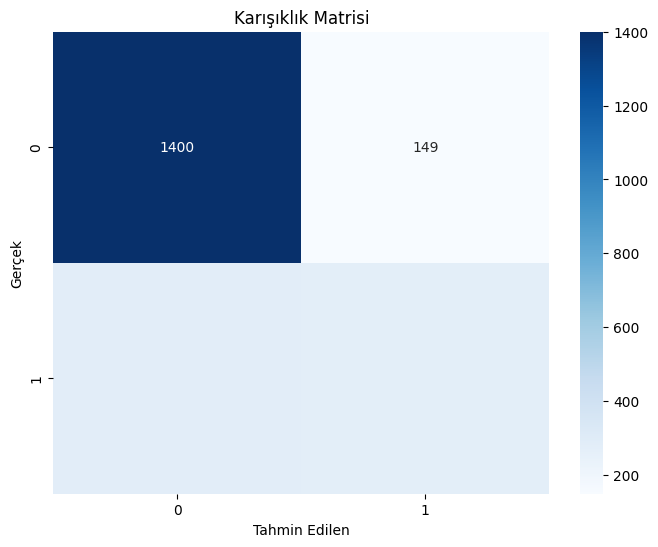

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Karışıklık matrisini görselleştir
conf_matrix = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Karışıklık Matrisi')
plt.show()


             Feature  Importance
4             tenure    0.161040
18      TotalCharges    0.154247
17    MonthlyCharges    0.145299
14          Contract    0.142675
8     OnlineSecurity    0.067899
11       TechSupport    0.060878
7    InternetService    0.044115
16     PaymentMethod    0.039604
9       OnlineBackup    0.028785
10  DeviceProtection    0.020562
15  PaperlessBilling    0.019431
6      MultipleLines    0.017885
1      SeniorCitizen    0.017474
0             gender    0.015339
13   StreamingMovies    0.015225
3         Dependents    0.014944
12       StreamingTV    0.014707
2            Partner    0.014568
5       PhoneService    0.005323


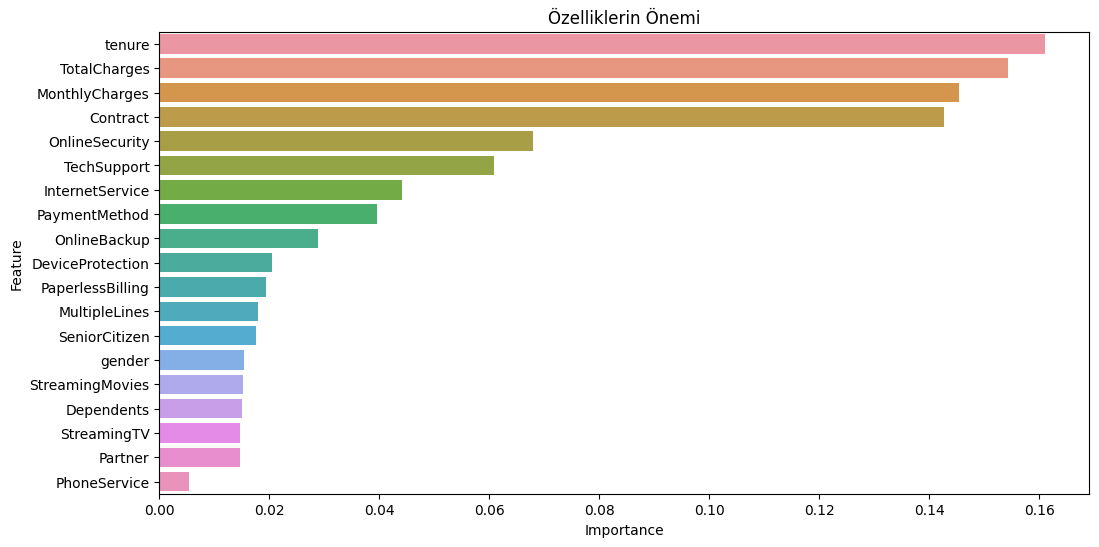

In [62]:
# Özellik önemini yazdırdık 
feature_importances = best_rf_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

# Özellik önemini görselleştirdik
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Özelliklerin Önemi')
plt.show()


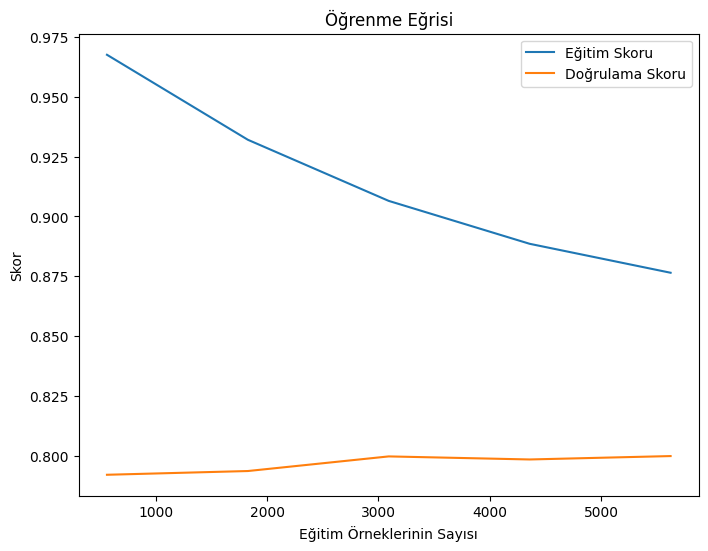

In [63]:
from sklearn.model_selection import learning_curve
import numpy as np

# Öğrenme eğrisi
train_sizes, train_scores, test_scores = learning_curve(
    best_rf_model, X_scaled, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5))

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label='Eğitim Skoru')
plt.plot(train_sizes, test_scores_mean, label='Doğrulama Skoru')
plt.xlabel('Eğitim Örneklerinin Sayısı')
plt.ylabel('Skor')
plt.title('Öğrenme Eğrisi')
plt.legend(loc='best')
plt.show()


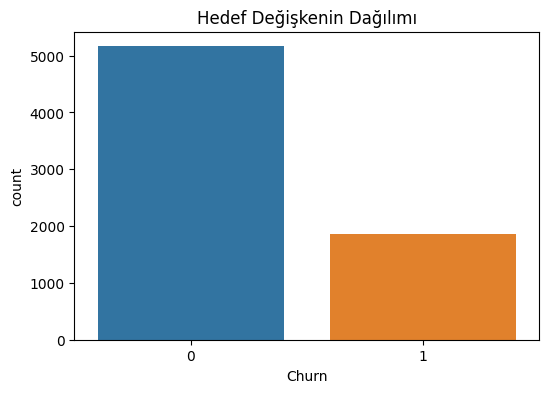

In [64]:
# Hedef değişkenin dağılımını görselleştir
plt.figure(figsize=(6, 4))
sns.countplot(x=y)
plt.title('Hedef Değişkenin Dağılımı')
plt.show()


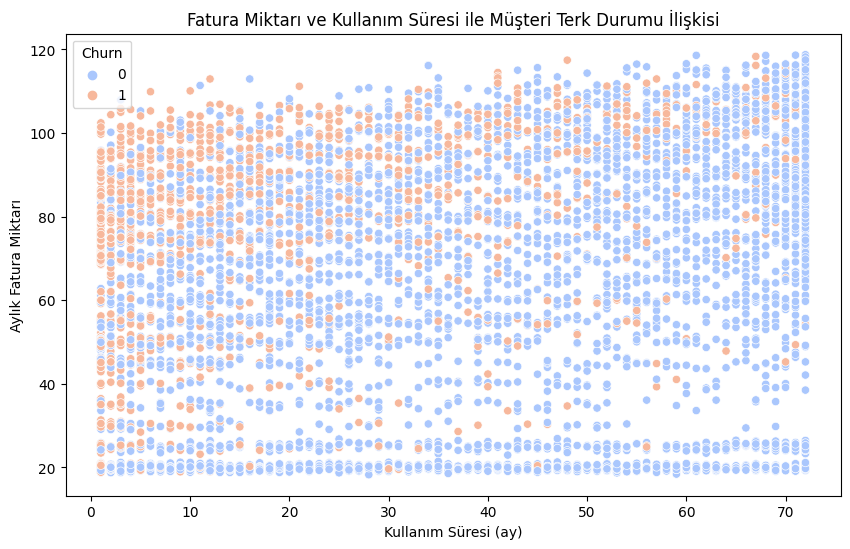

In [65]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', data=data, palette='coolwarm')
plt.title('Fatura Miktarı ve Kullanım Süresi ile Müşteri Terk Durumu İlişkisi')
plt.xlabel('Kullanım Süresi (ay)')
plt.ylabel('Aylık Fatura Miktarı')
plt.show()


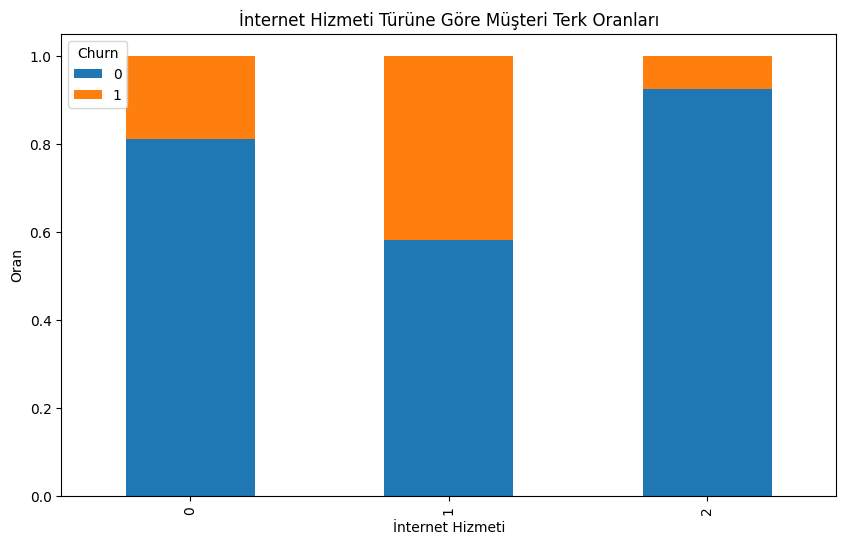

In [66]:
internet_service_churn = pd.crosstab(data['InternetService'], data['Churn'])

internet_service_churn.div(internet_service_churn.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('İnternet Hizmeti Türüne Göre Müşteri Terk Oranları')
plt.xlabel('İnternet Hizmeti')
plt.ylabel('Oran')
plt.legend(title='Churn')
plt.show()


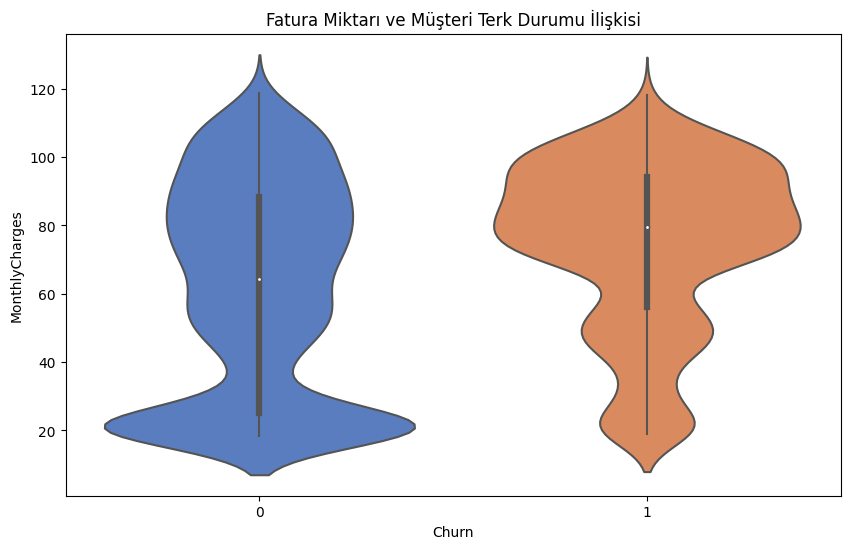

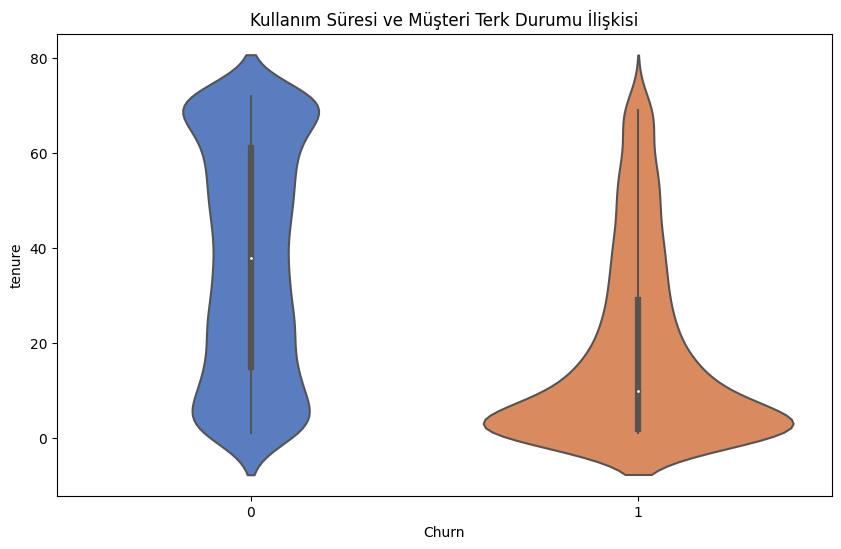

In [67]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Churn', y='MonthlyCharges', data=data, palette='muted')
plt.title('Fatura Miktarı ve Müşteri Terk Durumu İlişkisi')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='Churn', y='tenure', data=data, palette='muted')
plt.title('Kullanım Süresi ve Müşteri Terk Durumu İlişkisi')
plt.show()


In [68]:
from sklearn.model_selection import GridSearchCV

# Parametre gridini tanımla
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search'i başlat
grid_search = GridSearchCV(estimator=best_rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Grid search'i gerçekleştir
grid_search.fit(X_train, y_train)

# En iyi parametreleri ve en iyi modeli al
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# En iyi parametreleri yazdır
print("En iyi parametreler:", best_params)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
En iyi parametreler: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
